## Importing Libraries

In [1]:
## loading and preprocessing dataset
import pandas as pd
import numpy as np

## visualzing the dataset
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

## 
from azureml.core import Workspace, Dataset

## performing feature engineering
from sklearn.preprocessing import LabelEncoder

## Loading And Overviewing Of Dataset

In [2]:
data = pd.read_csv('../dataset/weather_dataset_raw.csv')

In [3]:
## create a copy of the data
df = data.copy()

In [4]:
## lets view the first 5 rows 
df.head()

,S_No,Timestamp,Location,Temperature_C,Apparent_Temperature_C,Humidity,Wind_speed_kmph,Wind_bearing_degrees,Visibility_km,Pressure_millibars,Weather_conditions
0,0,2006-04-01 00:00:00+02:00,"Port of Turku, Finland",9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,rain
1,1,2006-04-01 01:00:00+02:00,"Port of Turku, Finland",9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,rain
2,2,2006-04-01 02:00:00+02:00,"Port of Turku, Finland",9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,rain
3,3,2006-04-01 03:00:00+02:00,"Port of Turku, Finland",8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,NaN
4,4,2006-04-01 04:00:00+02:00,"Port of Turku, Finland",8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,rain


In [5]:
## lets view the last 5 rows
df.tail()

,S_No,Timestamp,Location,Temperature_C,Apparent_Temperature_C,Humidity,Wind_speed_kmph,Wind_bearing_degrees,Visibility_km,Pressure_millibars,Weather_conditions
96448,96269,2016-09-03 08:00:00+02:00,"Port of Turku, Finland",19.483333,19.483333,0.71,7.2772,2,15.1501,1018.90,clear
96449,96272,2016-09-03 11:00:00+02:00,"Port of Turku, Finland",27.616667,27.100000,0.36,6.8425,350,15.5526,1019.14,clear
96450,96295,2016-09-30 10:00:00+02:00,"Port of Turku, Finland",17.988889,17.988889,0.64,7.7763,182,15.7297,1020.58,clear
96451,96298,2016-09-30 13:00:00+02:00,"Port of Turku, Finland",25.000000,25.000000,0.39,12.6063,202,16.1000,1019.87,clear
96452,96309,2016-09-04 00:00:00+02:00,"Port of Turku, Finland",17.083333,17.083333,0.73,3.2039,329,16.1000,1018.25,clear


## Dataset Understanding And Preprocessing

In [6]:
## lets the check the number of cols and rows for train data
print(f"Total Number Of Rows: {df.shape[0]} -> Total Number Of Cols: {df.shape[1]}")

Total Number Of Rows: 96453 -> Total Number Of Cols: 11


In [7]:
## findng a summary description of the train data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   S_No                    96453 non-null  int64  
 1   Timestamp               96453 non-null  object 
 2   Location                96453 non-null  object 
 3   Temperature_C           96453 non-null  float64
 4   Apparent_Temperature_C  96453 non-null  float64
 5   Humidity                96453 non-null  float64
 6   Wind_speed_kmph         96453 non-null  float64
 7   Wind_bearing_degrees    96453 non-null  int64  
 8   Visibility_km           96453 non-null  float64
 9   Pressure_millibars      96453 non-null  float64
 10  Weather_conditions      96448 non-null  object 
dtypes: float64(6), int64(2), object(3)
memory usage: 8.1+ MB


In [8]:
## lets compute a summary statistics of the dataset
df.describe().round()

,S_No,Temperature_C,Apparent_Temperature_C,Humidity,Wind_speed_kmph,Wind_bearing_degrees,Visibility_km,Pressure_millibars
count,96453.0,96453.0,96453.0,96453.0,96453.0,96453.0,96453.0,96453.0
mean,48226.0,12.0,11.0,1.0,11.0,188.0,10.0,1003.0
std,27844.0,10.0,11.0,0.0,7.0,107.0,4.0,117.0
min,0.0,-22.0,-28.0,0.0,0.0,0.0,0.0,0.0
25%,24113.0,5.0,2.0,1.0,6.0,116.0,8.0,1012.0
50%,48226.0,12.0,12.0,1.0,10.0,180.0,10.0,1016.0
75%,72339.0,19.0,19.0,1.0,14.0,290.0,15.0,1021.0
max,96452.0,40.0,39.0,1.0,64.0,359.0,16.0,1046.0


In [9]:
## lets check the formats of each columns
df.dtypes

S_No                        int64
Timestamp                  object
Location                   object
Temperature_C             float64
Apparent_Temperature_C    float64
Humidity                  float64
Wind_speed_kmph           float64
Wind_bearing_degrees        int64
Visibility_km             float64
Pressure_millibars        float64
Weather_conditions         object
dtype: object

In [10]:
## lets check the dataset for duplicates
df.duplicated().sum()

0

In [11]:
## lets check for missing values 
df.isnull().sum()

S_No                      0
Timestamp                 0
Location                  0
Temperature_C             0
Apparent_Temperature_C    0
Humidity                  0
Wind_speed_kmph           0
Wind_bearing_degrees      0
Visibility_km             0
Pressure_millibars        0
Weather_conditions        5
dtype: int64

In [12]:
## lets convert the datatype of the Timestamp column
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [13]:
## lets fill the missing values in the Weather_conditions columns
## using the forward fill (ffill) method
df['Weather_conditions'].fillna(method='ffill', inplace=True, axis=0)

### Feature Engineering

In [14]:
## lets find the counts of each lables
df['Weather_conditions'].value_counts()

rain     82271
snow     10712
clear     3470
Name: Weather_conditions, dtype: int64

In [15]:
## lets replace the instance of some labels
df['Weather_conditions'].replace({"snow": "no_rain", "clear": "no_rain"}, inplace=True)

In [16]:
## lets perform label encoding

## creating an instance of the label encoder
le = LabelEncoder()

## asssign the column to transform
y = df['Weather_conditions']

## train and train and transform
y = le.fit_transform(y)



In [17]:
## create a new column and add it to the existing dataframe
y = pd.DataFrame(data=y, columns=['Current_weather_condition'])
df = pd.concat([df,y], axis=1)


In [18]:
## lets drop the previous column
df.drop(['Weather_conditions'], axis=1, inplace=True)

In [19]:
## preview the current datafram
df.head()

,S_No,Timestamp,Location,Temperature_C,Apparent_Temperature_C,Humidity,Wind_speed_kmph,Wind_bearing_degrees,Visibility_km,Pressure_millibars,Current_weather_condition
0,0,2006-04-01 00:00:00+02:00,"Port of Turku, Finland",9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,1
1,1,2006-04-01 01:00:00+02:00,"Port of Turku, Finland",9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,1
2,2,2006-04-01 02:00:00+02:00,"Port of Turku, Finland",9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,1
3,3,2006-04-01 03:00:00+02:00,"Port of Turku, Finland",8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,1
4,4,2006-04-01 04:00:00+02:00,"Port of Turku, Finland",8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,1


In [20]:
## lets create a new feature by shiffting the the Current_weather_condition by four rows
df['Future_weather_condition'] = df['Current_weather_condition'].shift(4, axis=0)
df.dropna(inplace=True)

## Exploratory Data Analysis

In [22]:
## lets select only numeric columns
numerical_cols = df.select_dtypes(exclude=[object])

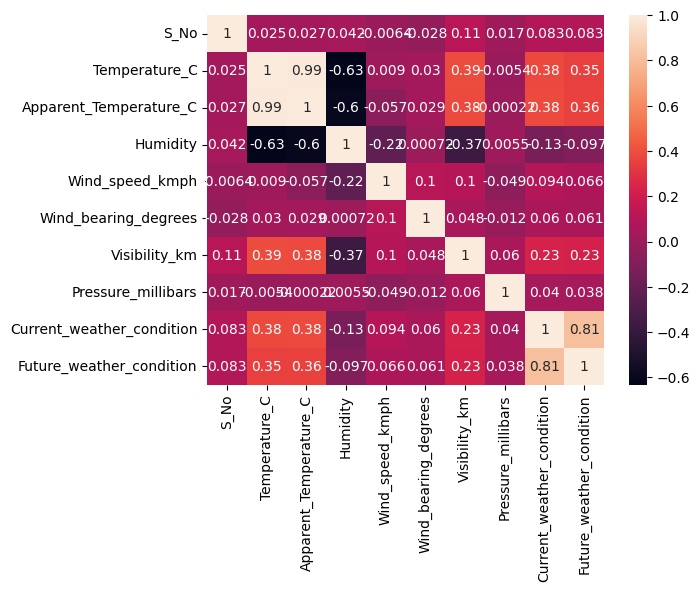

In [24]:
## lets compute the correlation using pearson correlation coefficient
numerical_cols.corr(method='pearson')

## Visualizing using heatmap
corrMatrix = numerical_cols.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [25]:
# Filter or drop irrelevent data columns
df.drop(['S_No', 'Apparent_Temperature_C'],axis=1,inplace=True)

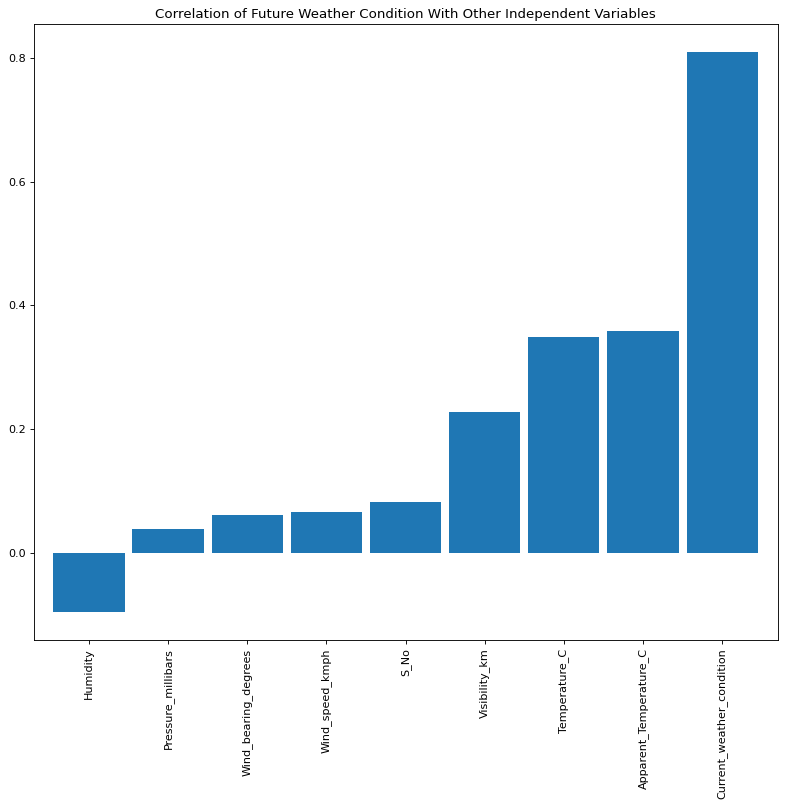

In [30]:
## lets observer the dependent variable (Future_weather_condition)
## and its correlation with other indepedent variables

figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='w')
numerical_cols.corr(method ='pearson')['Future_weather_condition'].sort_values(ascending=True).drop(['Future_weather_condition']).plot(kind='bar', width=0.9)

plt.title('Correlation of Future Weather Condition With Other Independent Variables')
plt.show()

### Performing A Timeseries Analysis Of Temperature

In [31]:
## select the Timestamp and Temperature columns
time_col = df['Timestamp']
temp_col = df['Temperature_C']

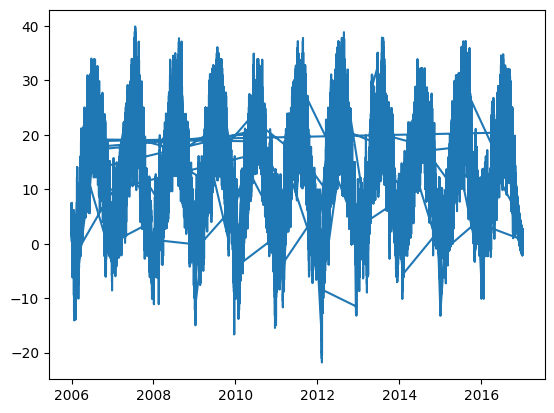

In [32]:
## plot a timeseries graph
plt.plot(time_col, temp_col)
plt.show()

In [33]:
## lets save the processed dataset
df.to_csv('../dataset/weather_dataset_processed.csv', index=False)